In [46]:
import cv2
from skimage.measure import label, regionprops
from skimage import io, measure, color
from skimage.filters import threshold_otsu
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from scipy.ndimage import center_of_mass



In [47]:
#load the mask data
mask_data_15_percent = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234515Z-001/Masks/15percent_masks"
mask_data_2nd_with_light = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234515Z-001/Masks/secondwithlight_masks"

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_0_shade.png is a low contrast image
  return func(*args, **kwargs)


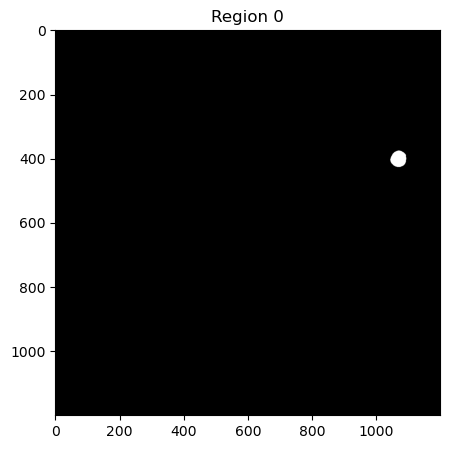

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_1_shade.png is a low contrast image
  return func(*args, **kwargs)


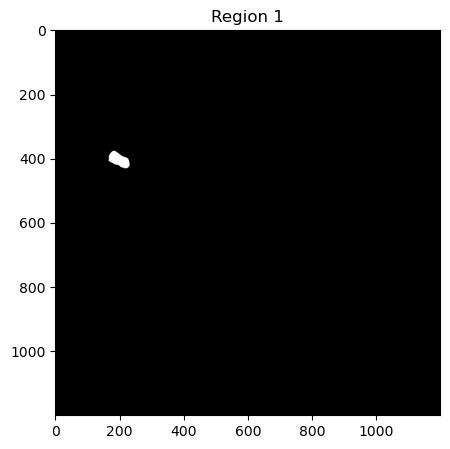

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_2_shade.png is a low contrast image
  return func(*args, **kwargs)


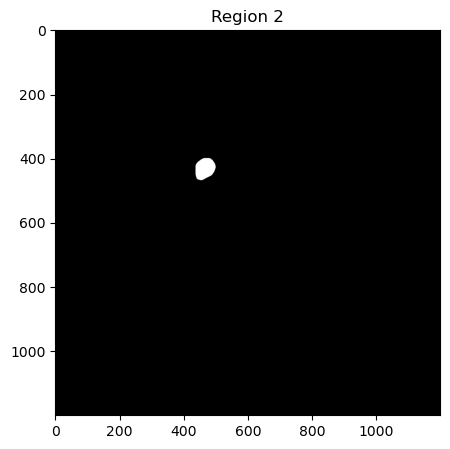

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_3_shade.png is a low contrast image
  return func(*args, **kwargs)


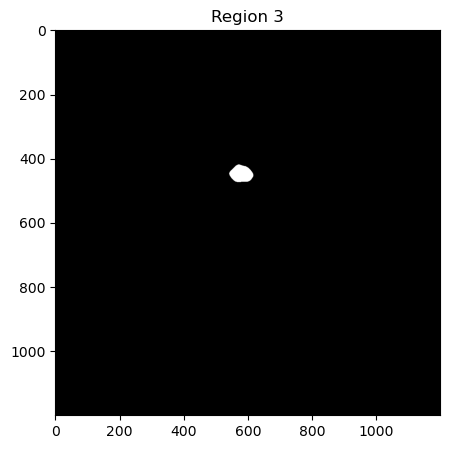

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_4_shade.png is a low contrast image
  return func(*args, **kwargs)


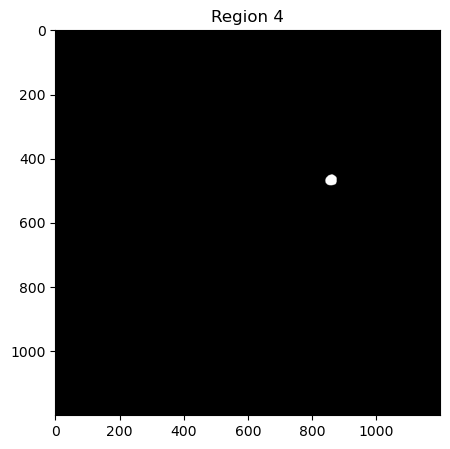

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_5_shade.png is a low contrast image
  return func(*args, **kwargs)


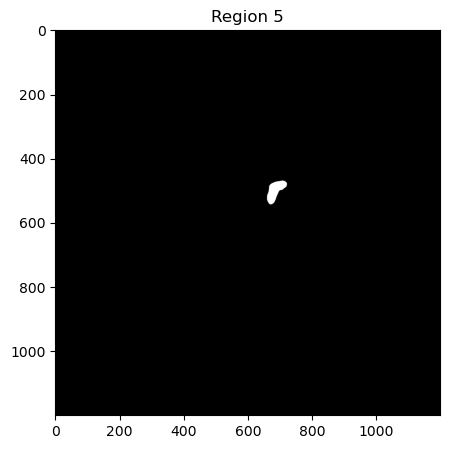

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_6_shade.png is a low contrast image
  return func(*args, **kwargs)


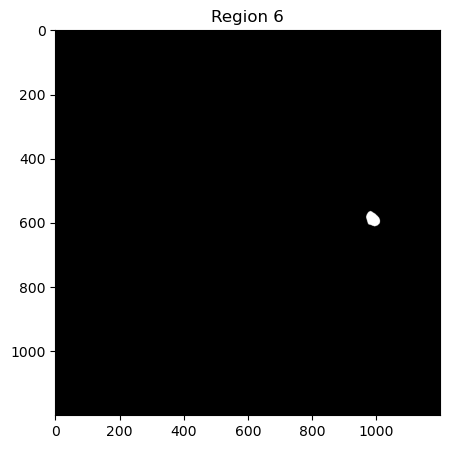

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_7_shade.png is a low contrast image
  return func(*args, **kwargs)


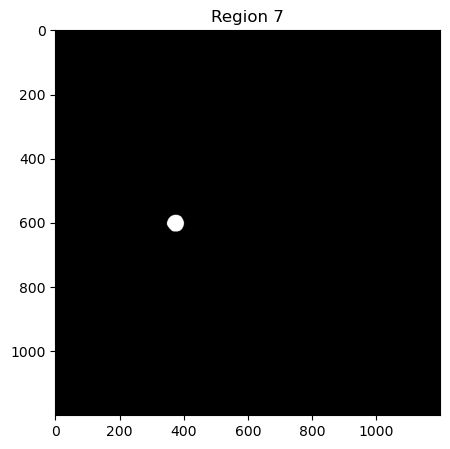

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_8_shade.png is a low contrast image
  return func(*args, **kwargs)


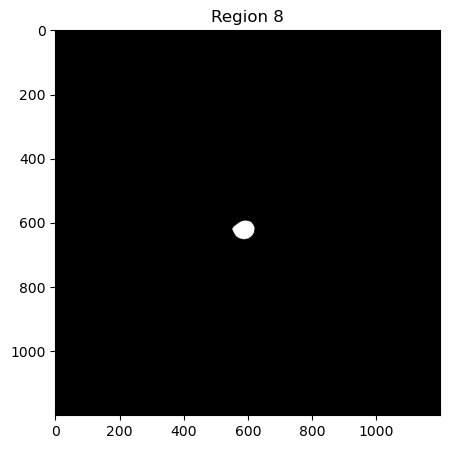

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_9_shade.png is a low contrast image
  return func(*args, **kwargs)


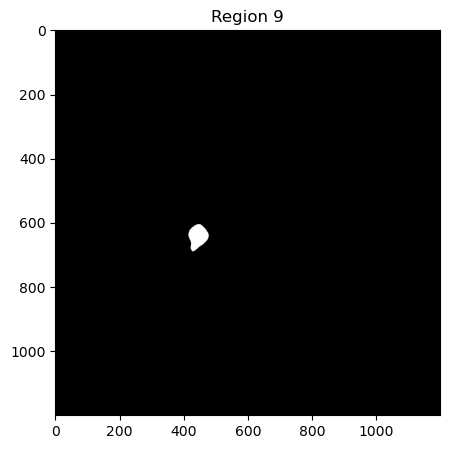

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_10_shade.png is a low contrast image
  return func(*args, **kwargs)


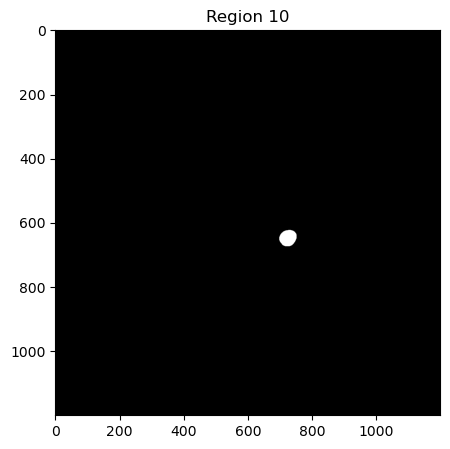

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_11_shade.png is a low contrast image
  return func(*args, **kwargs)


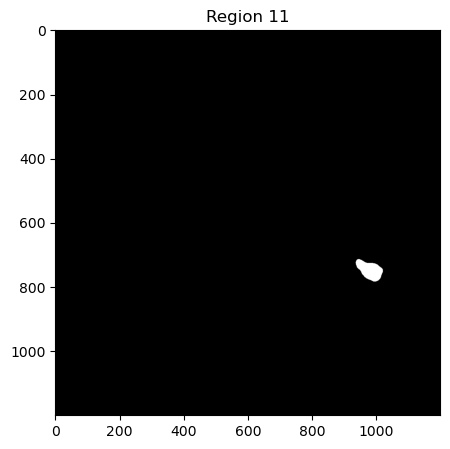

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_12_shade.png is a low contrast image
  return func(*args, **kwargs)


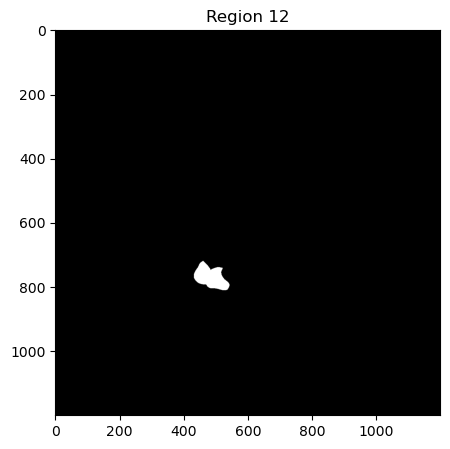

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_13_shade.png is a low contrast image
  return func(*args, **kwargs)


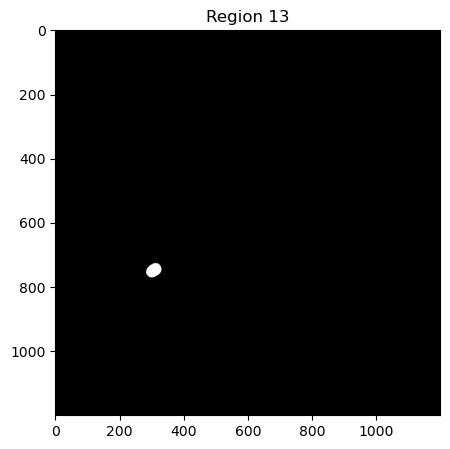

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_14_shade.png is a low contrast image
  return func(*args, **kwargs)


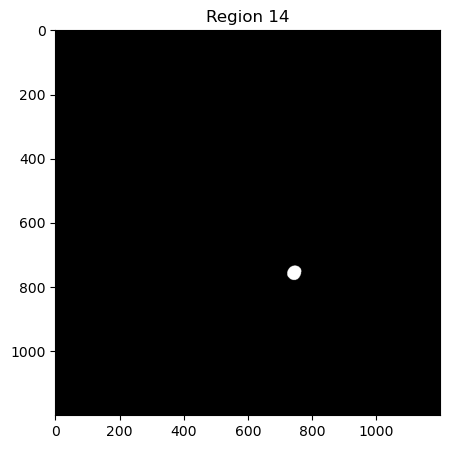

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_15_shade.png is a low contrast image
  return func(*args, **kwargs)


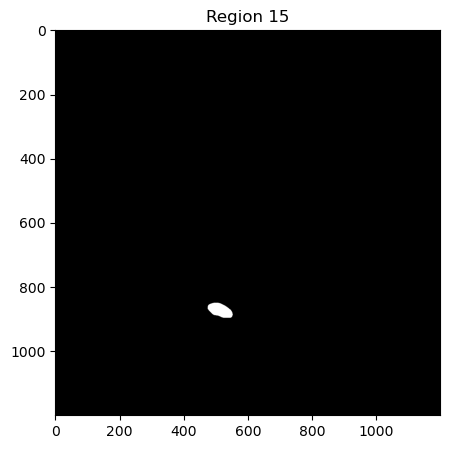

A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:/3rd_Year_Project/Project_code/data/Seperated_mask_data\region_16_shade.png is a low contrast image
  return func(*args, **kwargs)


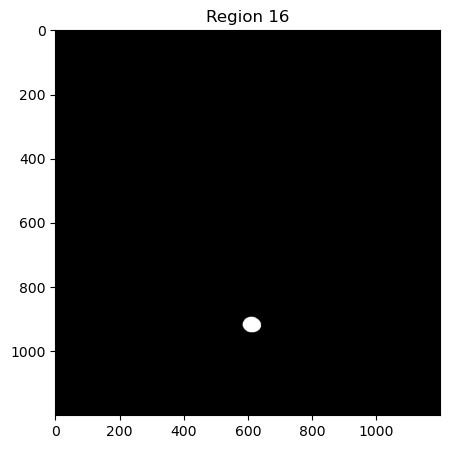

In [48]:
# Step 1: Load the greyscale image
image_path = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234155Z-001/Masks/secondwithlight_masks/"
image = io.imread(os.path.join(image_path, '0000.png'))  # Replace with your image file name

# Check if the image has an alpha channel (RGBA)
if image.shape[2] == 4:  # Check if it's an RGBA image
    image = image[:, :, :3]  # Remove the alpha channel (keep only RGB)

# Check if the image is grayscale
if len(image.shape) > 2:
    image = color.rgb2gray(image)  # Convert RGB to grayscale

# Step 2: Threshold the image (if needed)
# Here, we are using Otsu's method for automatic thresholding
threshold_value = threshold_otsu(image)
binary_image = image > threshold_value

# Step 3: Label the regions
label_image = measure.label(binary_image)

# Step 4: Extract region properties
regions = measure.regionprops(label_image)

#make folder for saving images
output_folder = "A:/3rd_Year_Project/Project_code/data/Seperated_mask_data"
if not os.path.exists(output_folder):  # If the folder does not exist, create it
    os.makedirs(output_folder)

# Step 5: Create new images with only one shade
# For each unique region, create a new image with just that region's pixels set
for i, region in enumerate(regions):
    minr, minc, maxr, maxc = region.bbox
    # Create an empty image for each region
    region_image = np.zeros_like(image)
    region_image[minr:maxr, minc:maxc] = binary_image[minr:maxr, minc:maxc]

    # Step 6: Save the new image with only one shade
    region_image_uint8 = (region_image * 255).astype(np.uint8)
    output_image_path = os.path.join(output_folder, f"region_{i}_shade.png")
    io.imsave(output_image_path, region_image_uint8)

    # Display the region image
    plt.figure(figsize=(5, 5))
    plt.imshow(region_image, cmap='gray')
    plt.title(f'Region {i}')
    plt.show()

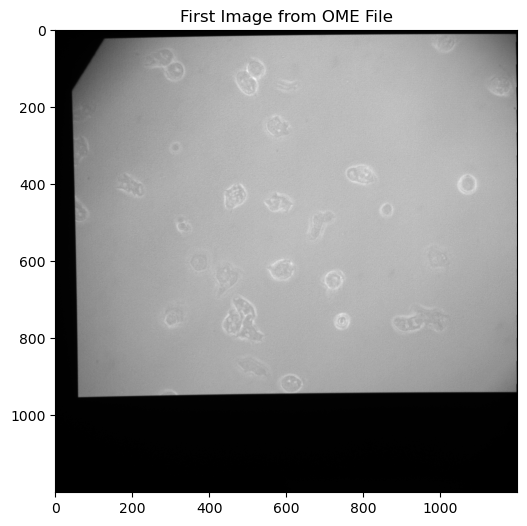

In [49]:
#time to load in the actual data
# Step 6: Create the folder for saving the results of multiplication
result_folder = "A:/3rd_Year_Project/Project_code/data/Masks-20250217T234155Z-001/Masks/Isolated_NOT_resized_amoeba/"
if not os.path.exists(result_folder):  # If the folder does not exist, create it
    os.makedirs(result_folder)

# Step 7: Load the first image from "secondwithlight_MMStack_Default.ome" directory
ome_image_path = r"A:\3rd_Year_Project\Project_code\data\Data-20250217T234725Z-002\Data\secondwithlight_MMStack_Default.ome.tif"

# Read the .ome.tiff file
with tifffile.TiffFile(ome_image_path) as tif:
    image = tif.pages[0].asarray()  # Load the first image in the file

# Display the first image
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("First Image from OME File")
plt.show()


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_0_shade.png is a low contrast image
  return func(*args, **kwargs)


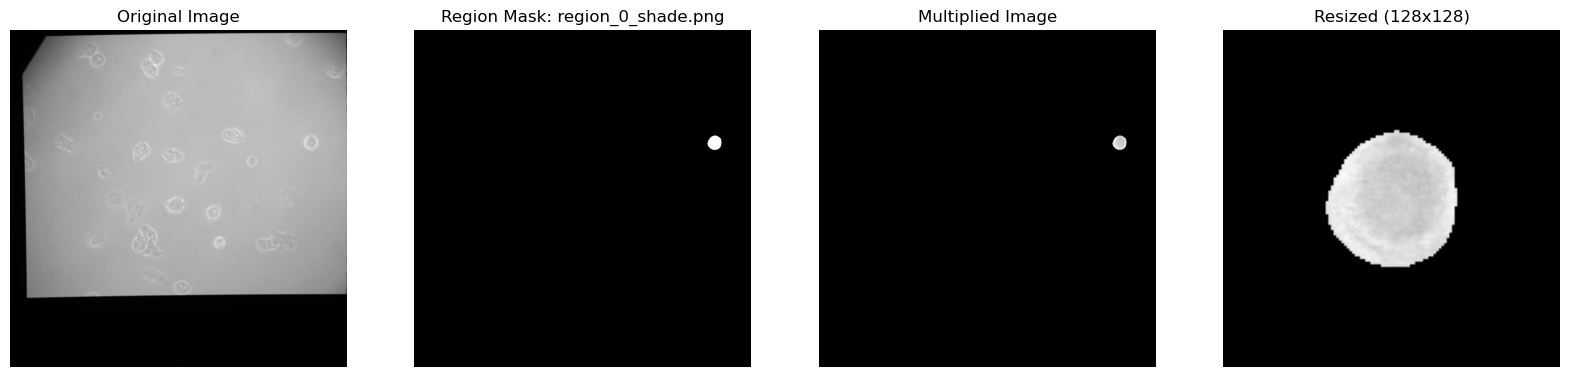

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_0_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_10_shade.png is a low contrast image
  return func(*args, **kwargs)


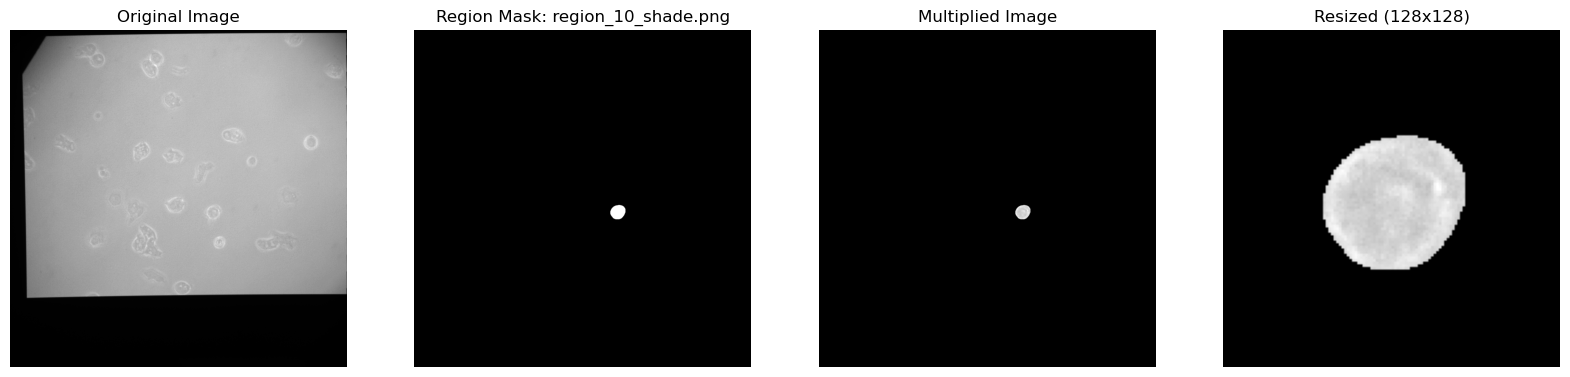

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_10_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_11_shade.png is a low contrast image
  return func(*args, **kwargs)


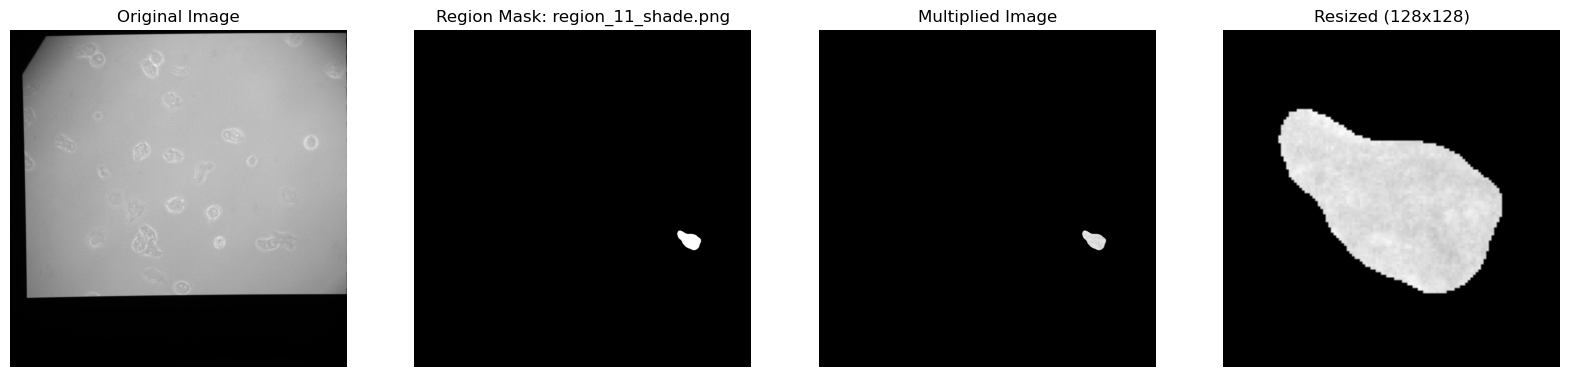

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_11_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_12_shade.png is a low contrast image
  return func(*args, **kwargs)


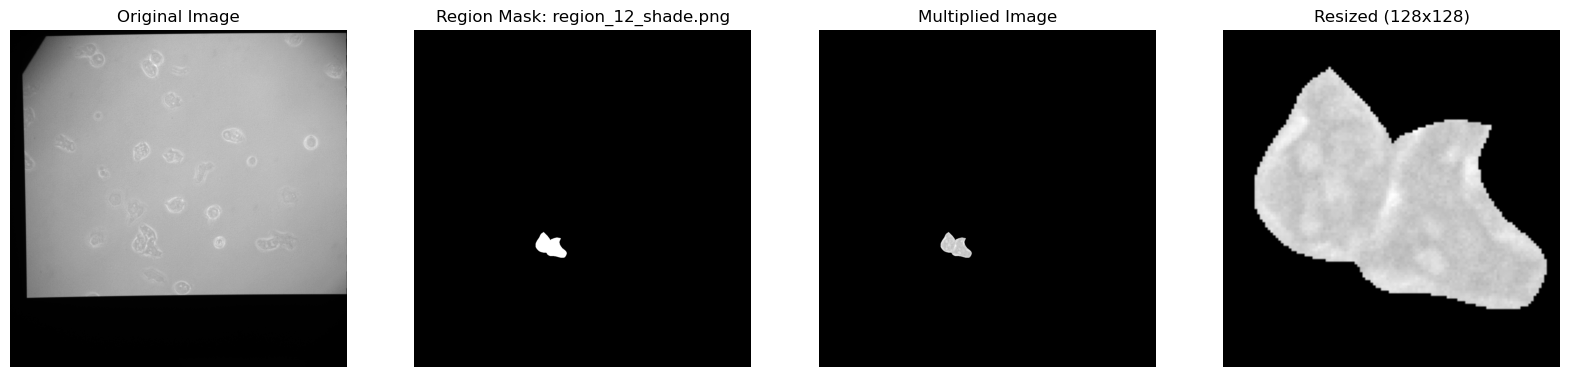

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_12_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_13_shade.png is a low contrast image
  return func(*args, **kwargs)


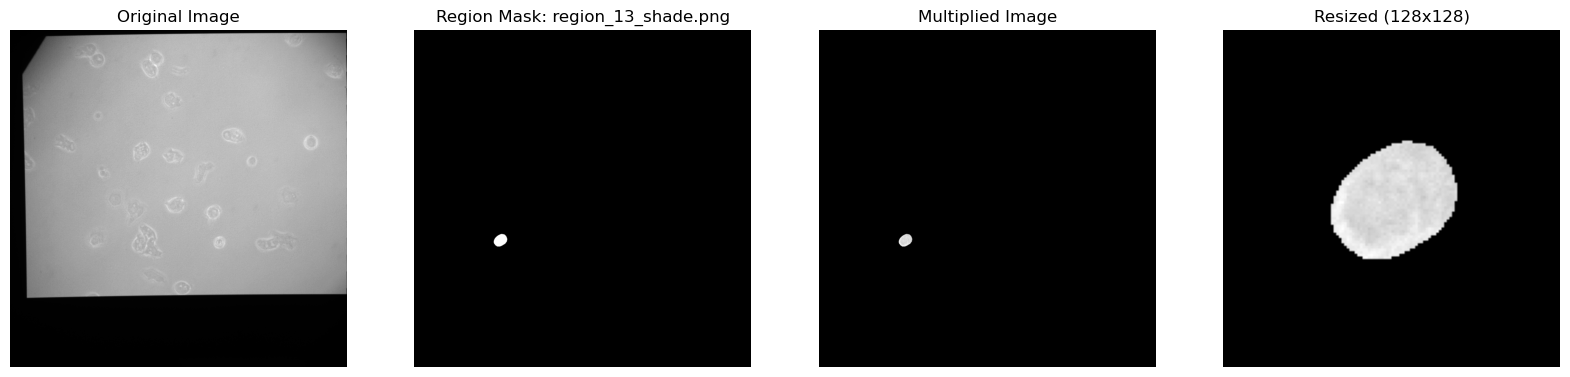

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_13_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_14_shade.png is a low contrast image
  return func(*args, **kwargs)


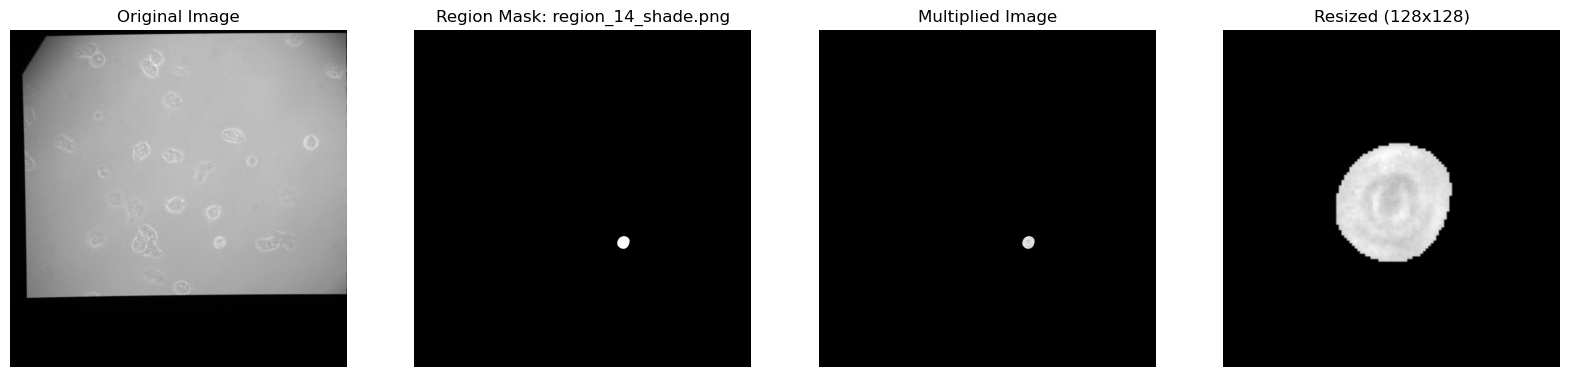

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_14_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_15_shade.png is a low contrast image
  return func(*args, **kwargs)


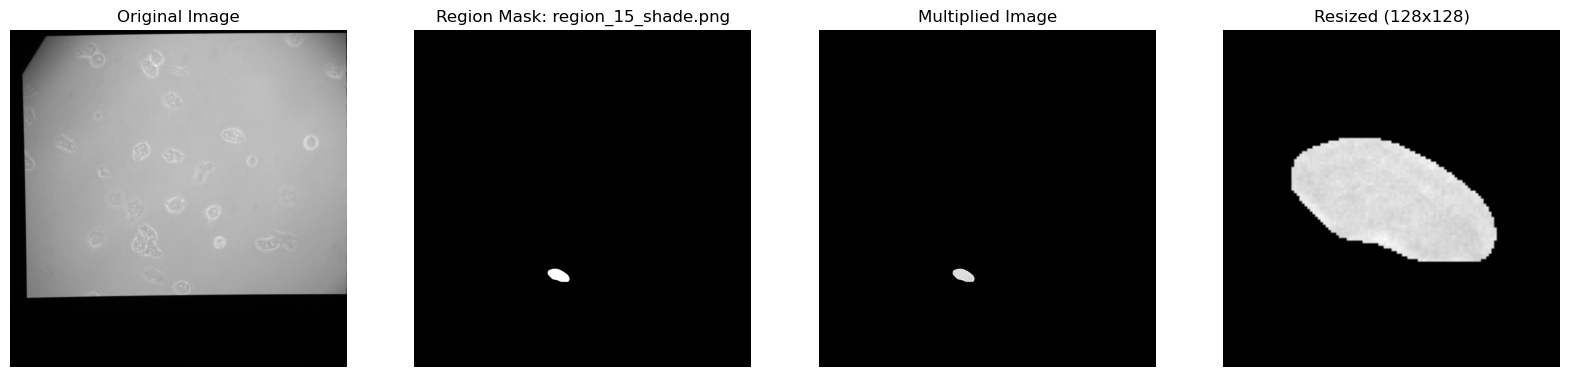

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_15_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_16_shade.png is a low contrast image
  return func(*args, **kwargs)


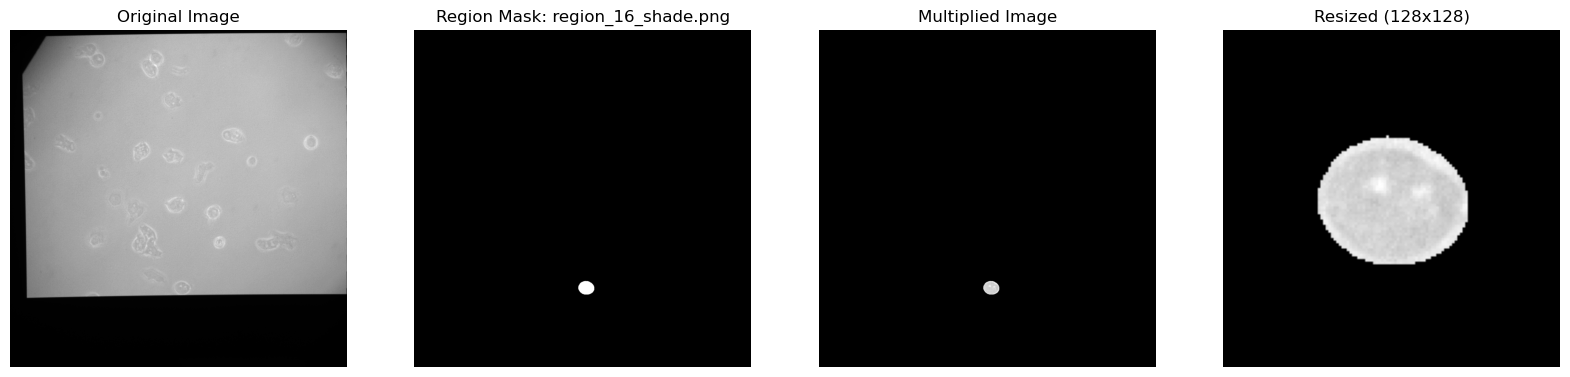

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_16_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_1_shade.png is a low contrast image
  return func(*args, **kwargs)


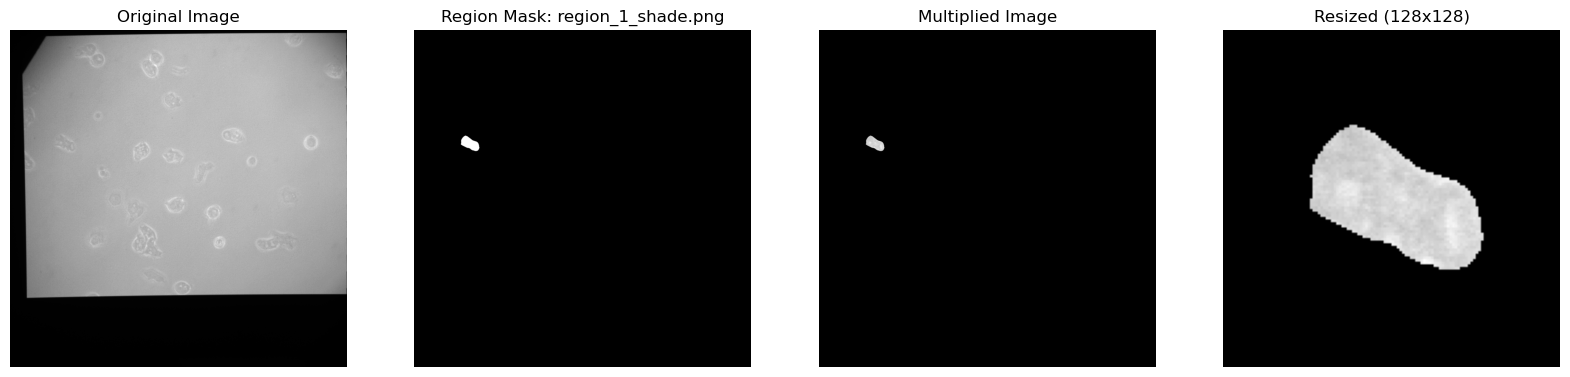

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_1_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_2_shade.png is a low contrast image
  return func(*args, **kwargs)


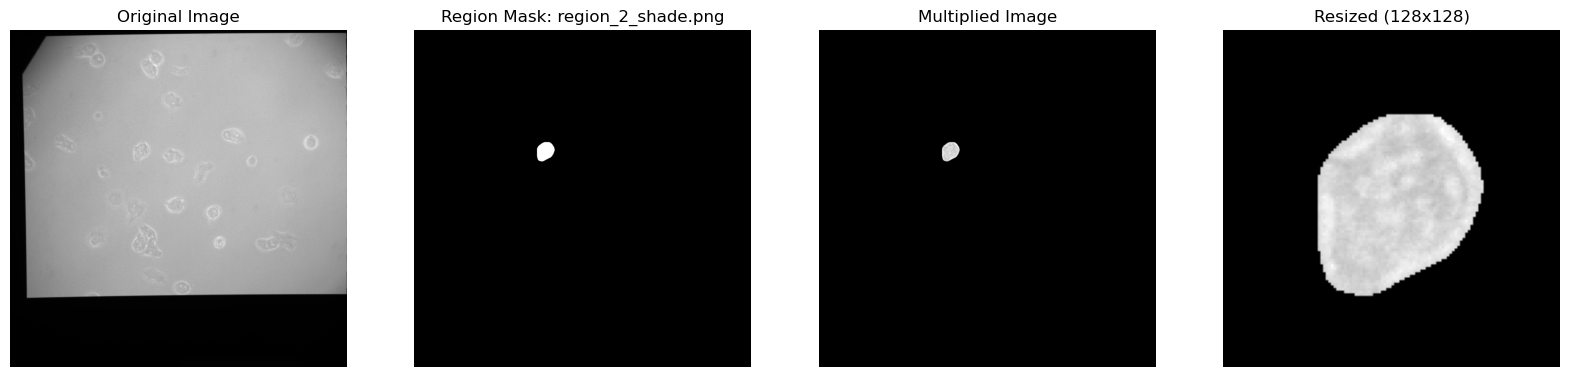

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_2_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_3_shade.png is a low contrast image
  return func(*args, **kwargs)


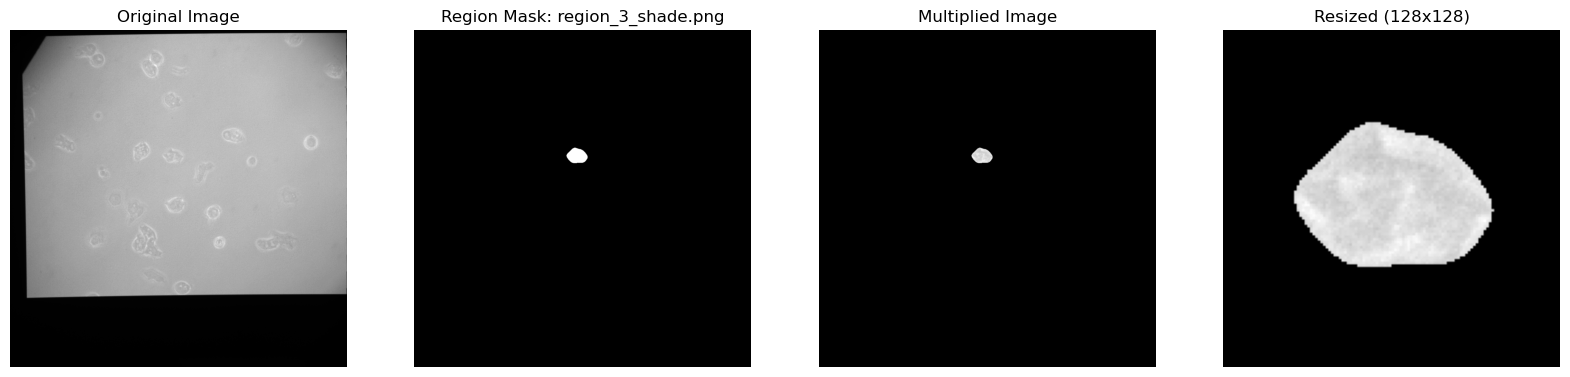

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_3_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_4_shade.png is a low contrast image
  return func(*args, **kwargs)


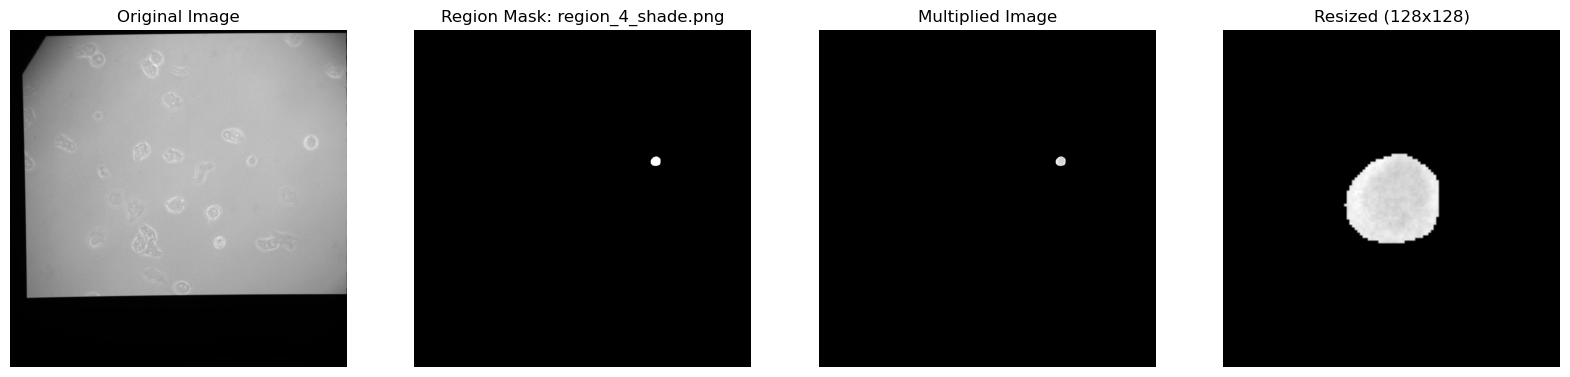

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_4_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_5_shade.png is a low contrast image
  return func(*args, **kwargs)


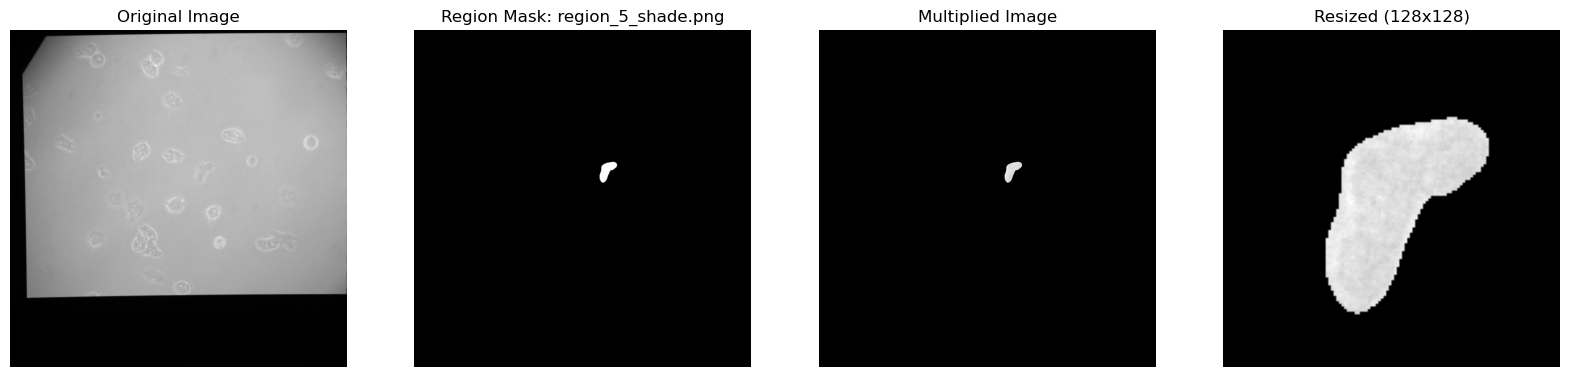

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_5_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_6_shade.png is a low contrast image
  return func(*args, **kwargs)


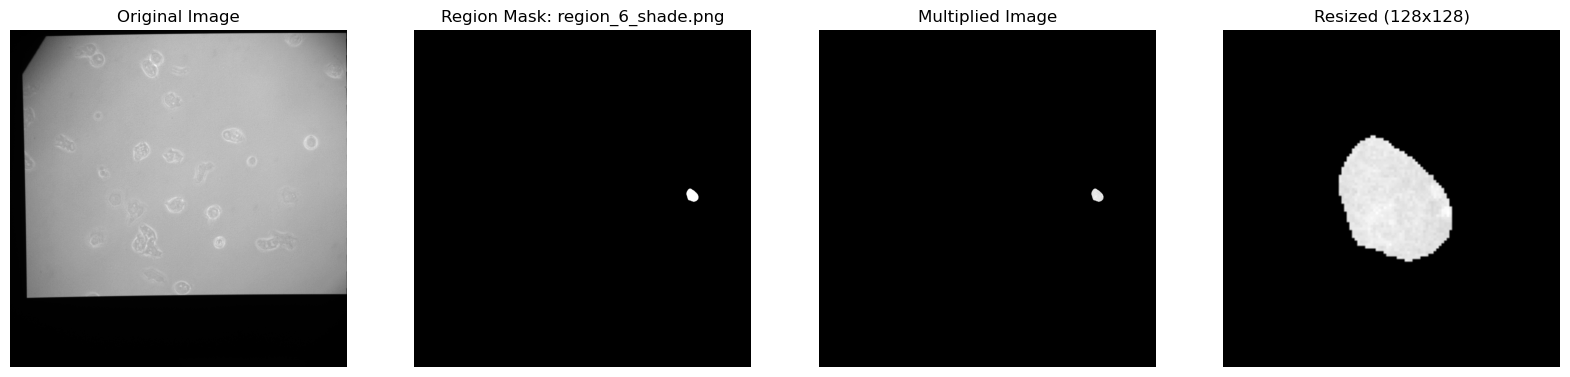

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_6_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_7_shade.png is a low contrast image
  return func(*args, **kwargs)


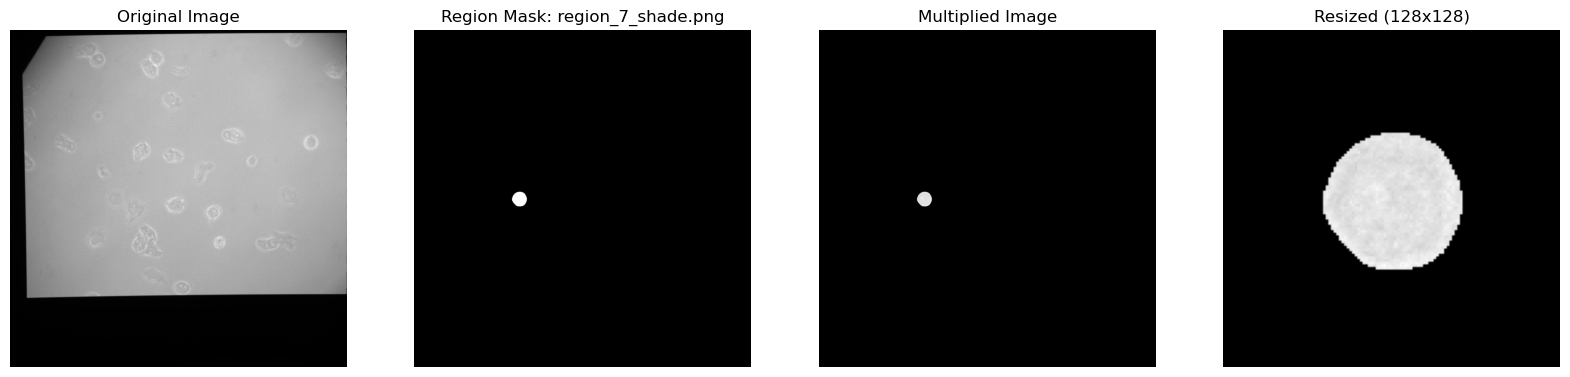

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_7_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_8_shade.png is a low contrast image
  return func(*args, **kwargs)


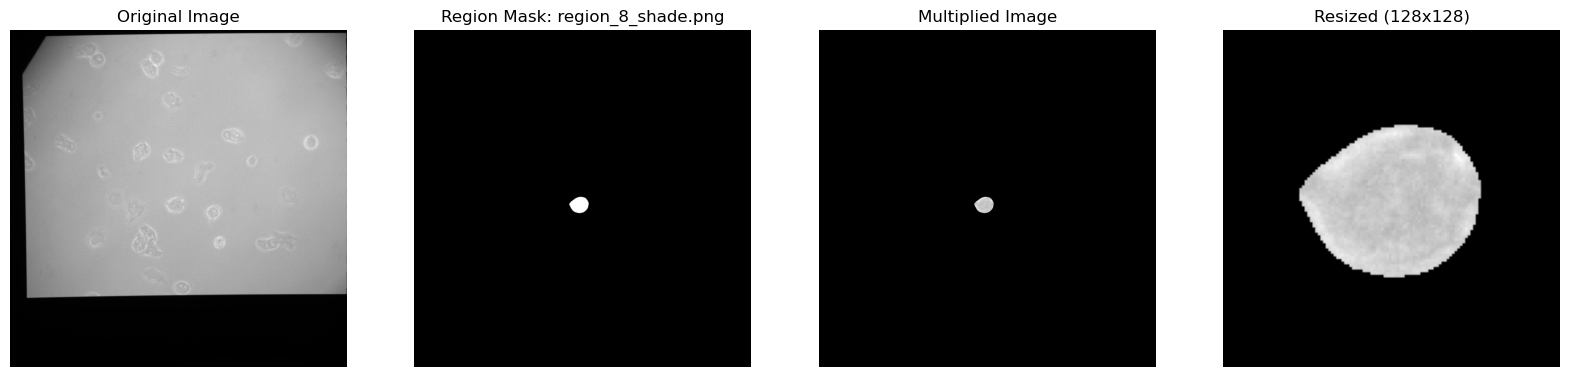

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_8_shade.png


A:\3rd_Year_Project\Anaconda\envs\lizard\lib\site-packages\skimage\_shared\utils.py:328: UserWarning: A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba\multiplied_region_9_shade.png is a low contrast image
  return func(*args, **kwargs)


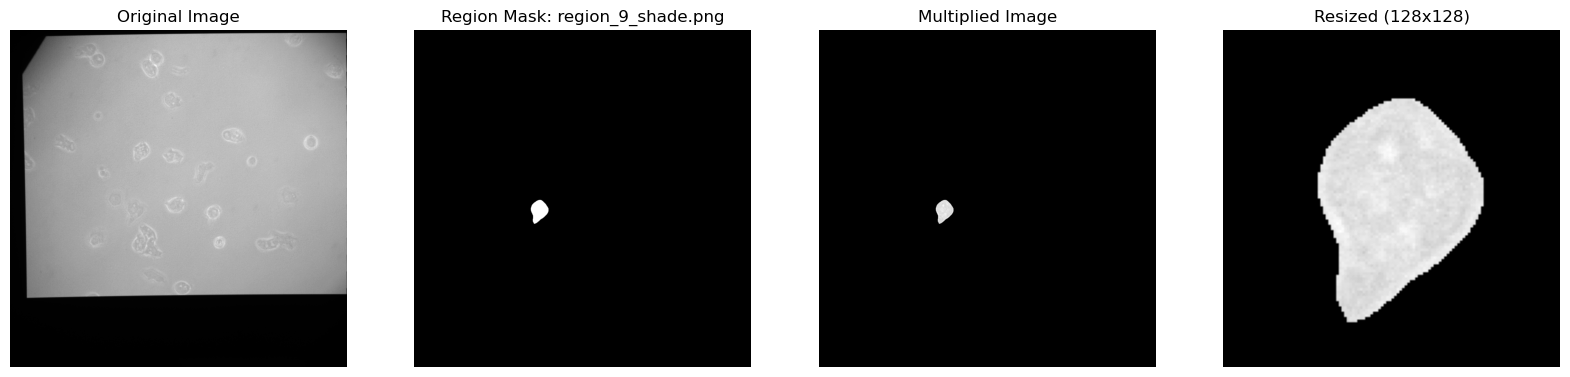

Saved resized image: A:\3rd_Year_Project\Project_code\data\Resized_128x128\resized_region_9_shade.png
Processing completed.


In [50]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from scipy.ndimage import center_of_mass

# Paths
raw_image_path = r"A:\3rd_Year_Project\Project_code\data\Data-20250217T234725Z-002\Data\secondwithlight_MMStack_Default.ome.tif"
region_images_folder = r"A:\3rd_Year_Project\Project_code\data\Seperated_mask_data"
output_folder = r"A:\3rd_Year_Project\Project_code\data\Masks-20250217T234155Z-001\Masks\Isolated_NOT_resized_amoeba"
resized_output_folder = r"A:\3rd_Year_Project\Project_code\data\Resized_128x128"

# Ensure output folders exist
os.makedirs(output_folder, exist_ok=True)
os.makedirs(resized_output_folder, exist_ok=True)

# Load the first image from the .ome.tif file
with tifffile.TiffFile(raw_image_path) as tif:
    raw_image = tif.pages[0].asarray().astype(np.float32)  # Convert to float32 for multiplication

# Process each region image
for region_filename in os.listdir(region_images_folder):
    if region_filename.endswith(".png") or region_filename.endswith(".tif"):
        region_image_path = os.path.join(region_images_folder, region_filename)

        # Load the regional image
        region_image = imread(region_image_path).astype(np.float32)

        # Ensure both images have the same dimensions
        if region_image.shape != raw_image.shape:
            print(f"Skipping {region_filename}: Shape mismatch {region_image.shape} vs {raw_image.shape}")
            continue

        # Multiply the images
        multiplied_image = raw_image * region_image

        # Normalize to 0-255
        multiplied_image = (multiplied_image / np.max(multiplied_image) * 255).astype(np.uint8)

        # Save the multiplied image
        output_path = os.path.join(output_folder, f"multiplied_{region_filename}")
        imsave(output_path, multiplied_image)

        # 🔹 **Fix: Compute the center of mass on region_image, not a folder path**
        center_y, center_x = center_of_mass(region_image)

        # Convert to integer coordinates
        center_y, center_x = int(center_y), int(center_x)

        # 🔹 Define cropping bounds (128x128)
        crop_size = 128
        half_size = crop_size // 2

        # Ensure cropping stays within bounds
        y_min = max(center_y - half_size, 0)
        y_max = min(center_y + half_size, multiplied_image.shape[0])
        x_min = max(center_x - half_size, 0)
        x_max = min(center_x + half_size, multiplied_image.shape[1])

        # Adjust if the crop size is smaller than 128 due to edges
        if y_max - y_min < crop_size:
            y_min = max(y_max - crop_size, 0)
            y_max = min(y_min + crop_size, multiplied_image.shape[0])

        if x_max - x_min < crop_size:
            x_min = max(x_max - crop_size, 0)
            x_max = min(x_min + crop_size, multiplied_image.shape[1])

        # Crop the multiplied image
        cropped_image = multiplied_image[y_min:y_max, x_min:x_max]

        # Save the resized image
        resized_output_path = os.path.join(resized_output_folder, f"resized_{region_filename}")
        imsave(resized_output_path, cropped_image)

        # Display the images
        fig, axes = plt.subplots(1, 4, figsize=(20, 5))
        axes[0].imshow(raw_image, cmap='gray')
        axes[0].set_title("Original Image")
        axes[0].axis("off")

        axes[1].imshow(region_image, cmap='gray')
        axes[1].set_title(f"Region Mask: {region_filename}")
        axes[1].axis("off")

        axes[2].imshow(multiplied_image, cmap='gray')
        axes[2].set_title("Multiplied Image")
        axes[2].axis("off")

        axes[3].imshow(cropped_image, cmap='gray')
        axes[3].set_title("Resized (128x128)")
        axes[3].axis("off")

        plt.show()

        print(f"Saved resized image: {resized_output_path}")

print("Processing completed.")